# Week 6 - Bivariate Analysis, part 2

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from datetime import datetime, timedelta
from google.colab import files

In [2]:
uploaded = files.upload()


Saving NetworkSecurity_Cleaned.csv to NetworkSecurity_Cleaned.csv


In [3]:
# Unnecessary cols = Timestamp, Source IP Address, Destination IP Address, Source Port, Destination Port, Device Info, User Info, Geo-location Data, Proxy Information

# Useful cols = Traffic Type, Protocol, Packet Type, Attack Type, Attack Signature, Action Taken, Severity Level, Network Segment, Log Source

In [4]:
ns = pd.read_csv("NetworkSecurity_Cleaned.csv")

pd.set_option('display.max_columns', None)
ns.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,Alert Triggered,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Alert Data,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,Alert Triggered,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",39.123.165.122,Log Data,Alert Data,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,IoC Detected,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",39.123.165.122,Log Data,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,IoC Detected,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,Log Data,Alert Data,Firewall


In [5]:
# Show unique values of ns dataset columns that I want to make numerical

TrafficType = ns["Traffic Type"].value_counts()
Protocol = ns["Protocol"].value_counts()
PacketType = ns["Packet Type"].value_counts()
AttackType = ns["Attack Type"].value_counts()
AttackSignature = ns["Attack Signature"].value_counts()
ActionTaken = ns["Action Taken"].value_counts()
SeverityLevel = ns["Severity Level"].value_counts()
NetworkSegment = ns["Network Segment"].value_counts()
LogSource = ns["Log Source"].value_counts()

print(TrafficType)
print(Protocol)
print(PacketType)
print(AttackType)
print(AttackSignature)
print(ActionTaken)
print(SeverityLevel)
print(NetworkSegment)
print(LogSource)

Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64
Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64
Packet Type
Control    20237
Data       19763
Name: count, dtype: int64
Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64
Attack Signature
Known Pattern A    20076
Known Pattern B    19924
Name: count, dtype: int64
Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64
Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64
Network Segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64
Log Source
Firewall    20116
Server      19884
Name: count, dtype: int64


In [6]:
# Get dummies and correlations of these columns

TrafficType = pd.get_dummies(ns['Traffic Type'])
Protocol = pd.get_dummies(ns["Protocol"])
PacketType = pd.get_dummies(ns["Packet Type"])
AttackType = pd.get_dummies(ns["Attack Type"])
AttackSignature = pd.get_dummies(ns["Attack Signature"])
ActionTaken = pd.get_dummies(ns["Action Taken"])
NetworkSegment = pd.get_dummies(ns["Network Segment"])
LogSource = pd.get_dummies(ns["Log Source"])

In [7]:
TrafficType # each "column" is now a dataset

,DNS,FTP,HTTP
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,True,False,False
...,...,...,...
39995,False,False,True
39996,False,False,True
39997,True,False,False
39998,False,True,False


In [8]:
print(TrafficType.corr())

print(Protocol.corr())

print(PacketType.corr())

print(AttackType.corr())

print(AttackSignature.corr())

print(ActionTaken.corr())

print(NetworkSegment.corr())

print(LogSource.corr())

           DNS       FTP      HTTP
DNS   1.000000 -0.499247 -0.501952
FTP  -0.499247  1.000000 -0.498799
HTTP -0.501952 -0.498799  1.000000
          ICMP       TCP       UDP
ICMP  1.000000 -0.500960 -0.501723
TCP  -0.500960  1.000000 -0.497314
UDP  -0.501723 -0.497314  1.000000
         Control  Data
Control      1.0  -1.0
Data        -1.0   1.0
               DDoS  Intrusion   Malware
DDoS       1.000000  -0.500734 -0.501920
Intrusion -0.500734   1.000000 -0.497342
Malware   -0.501920  -0.497342  1.000000
                 Known Pattern A  Known Pattern B
Known Pattern A              1.0             -1.0
Known Pattern B             -1.0              1.0
          Blocked   Ignored    Logged
Blocked  1.000000 -0.503884 -0.501585
Ignored -0.503884  1.000000 -0.494515
Logged  -0.501585 -0.494515  1.000000
           Segment A  Segment B  Segment C
Segment A   1.000000  -0.497902  -0.500398
Segment B  -0.497902   1.000000  -0.501697
Segment C  -0.500398  -0.501697   1.000000
          Fir

In [9]:
# Here, map the Severity Levels (Low, Medium, High to 1, 2, 3)

level = {'Low': 1,
       'Medium': 2,
       'High': 3
       }

ns['Severity Level'] = ns['Severity Level'].map(level)
ns['Severity Level']

,Severity Level
0,1
1,1
2,1
3,2
4,1
...,...
39995,2
39996,3
39997,1
39998,1


In [10]:
# create a dummy dataframe with useful features of the ns dataset
# This step is to concatentate all the individual datasets into one dataframe
# Next step is to concatentate the this dataframe with ns dataframe

dummy_df = pd.concat([TrafficType, Protocol, PacketType, AttackType, AttackSignature, ActionTaken, NetworkSegment, LogSource], axis=1)
dummy_df

,DNS,FTP,HTTP,ICMP,TCP,UDP,Control,Data,DDoS,Intrusion,Malware,Known Pattern A,Known Pattern B,Blocked,Ignored,Logged,Segment A,Segment B,Segment C,Firewall,Server
0,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,True
1,False,False,True,True,False,False,False,True,False,False,True,True,False,True,False,False,False,True,False,True,False
2,False,False,True,False,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True,True,False
3,False,False,True,False,False,True,False,True,False,False,True,False,True,True,False,False,False,True,False,True,False
4,True,False,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,True,True,False,False,True,False
39996,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,True,False,False,True,True,False
39997,True,False,False,False,False,True,False,True,True,False,False,False,True,True,False,False,False,False,True,False,True
39998,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True


In [11]:
# join the ns dataset to the dummy dataset
# in new_ns, dropped the columns that dummies were created for
# severity level - code 1,2,3,4 (map: low = 1, medium=2, etc)

drop = ['Protocol', 'Traffic Type', 'Packet Type', 'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Log Source', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Device Information', 'User Information', 'Geo-location Data', 'Proxy Information', 'Payload Data']

original_ns = ns.drop(columns=drop)

new_ns = pd.concat([original_ns, dummy_df], axis=1)
new_ns = new_ns.dropna(subset=['Severity Level'])
new_ns

,Timestamp,Packet Length,Malware Indicators,Anomaly Scores,Alerts/Warnings,Severity Level,Firewall Logs,IDS/IPS Alerts,DNS,FTP,HTTP,ICMP,TCP,UDP,Control,Data,DDoS,Intrusion,Malware,Known Pattern A,Known Pattern B,Blocked,Ignored,Logged,Segment A,Segment B,Segment C,Firewall,Server
0,2023-05-30 06:33:58,503,IoC Detected,28.67,Alert Triggered,1,Log Data,Alert Data,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,True
1,2020-08-26 07:08:30,1174,IoC Detected,51.50,Alert Triggered,1,Log Data,Alert Data,False,False,True,True,False,False,False,True,False,False,True,True,False,True,False,False,False,True,False,True,False
2,2022-11-13 08:23:25,306,IoC Detected,87.42,Alert Triggered,1,Log Data,Alert Data,False,False,True,False,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True,True,False
3,2023-07-02 10:38:46,385,IoC Detected,15.79,Alert Triggered,2,Log Data,Alert Data,False,False,True,False,False,True,False,True,False,False,True,False,True,True,False,False,False,True,False,True,False
4,2023-07-16 13:11:07,1462,IoC Detected,0.52,Alert Triggered,1,Log Data,Alert Data,True,False,False,False,True,False,False,True,True,False,False,False,True,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,1428,IoC Detected,39.28,Alert Triggered,2,Log Data,Alert Data,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,True,True,False,False,True,False
39996,2023-03-27 00:38:27,1184,IoC Detected,27.25,Alert Triggered,3,Log Data,Alert Data,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,True,False,False,True,True,False
39997,2022-03-31 01:45:49,1043,IoC Detected,31.01,Alert Triggered,1,Log Data,Alert Data,True,False,False,False,False,True,False,True,True,False,False,False,True,True,False,False,False,False,True,False,True
39998,2023-09-22 18:32:38,483,IoC Detected,97.85,Alert Triggered,1,Log Data,Alert Data,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True


In [12]:
# DNS/FTP/HTTP are from 1 variable called Traffic Type.
# ICMP/TCP/UDP is from 1 variable called Protocol.
# Control/Data is from 1 variable called Packet Type.
# DDoS/Intrusion/Malware is from Attack Type.
# Known Pattern A/Known Pattern B is from Attack Signature.
# Blocked/Ignored/Logged is from Action Taken.
# Segment A/Segment B/Segment C is from Network Segment.
# Firewall/Server is from Log Source.

In [14]:
new_ns_copy = new_ns.copy()

new_ns_copy = new_ns_copy.drop(columns=['Timestamp']) # Drop Timestamp as it causes Runtime to repeatedly crash

# Convert boolean columns (True/False) to 0/1
bool_cols = new_ns_copy.select_dtypes(include=['bool']).columns # BOOL columns

new_ns_copy[bool_cols] = new_ns_copy[bool_cols].astype(int)

# Identify categorical columns (non-numeric and non-boolean)
cat_cols = new_ns_copy.select_dtypes(exclude=['number', 'bool']).columns # CATEGORICAL columns

# Apply one-hot encoding to categorical columns
new_ns_encoded = pd.get_dummies(new_ns_copy, columns=cat_cols, dtype=int)

# Display the first few rows to verify encoding
print(new_ns_encoded.head())


   Packet Length  Anomaly Scores  Severity Level  DNS  FTP  HTTP  ICMP  TCP  \
0            503           28.67               1    0    0     1     1    0   
1           1174           51.50               1    0    0     1     1    0   
2            306           87.42               1    0    0     1     0    0   
3            385           15.79               2    0    0     1     0    0   
4           1462            0.52               1    1    0     0     0    1   

   UDP  Control  Data  DDoS  Intrusion  Malware  Known Pattern A  \
0    0        0     1     0          0        1                0   
1    0        0     1     0          0        1                1   
2    1        1     0     1          0        0                0   
3    1        0     1     0          0        1                0   
4    0        0     1     1          0        0                0   

   Known Pattern B  Blocked  Ignored  Logged  Segment A  Segment B  Segment C  \
0                1        0        

In [15]:
# Correlations between the numeric columns of ns (network security) dataset

# Columns removed as there is only 1 unique value: Malware Indicators_IoC Detected / Alerts/Warnings_Alert Triggered / Firewall Logs_Log Data / IDS/IPS Alerts_Alert Data
# This causes there to be NaN values in Correlation Matrix

# Identify constant columns (those with only one unique value)
constant_columns = new_ns_encoded.columns[new_ns_encoded.nunique() == 1]

# # Drop constant columns from the dataset
new_ns_encoded_cleaned = new_ns_encoded.drop(columns=constant_columns)

# # Now compute the correlation matrix again
ns_encoded_nums = new_ns_encoded_cleaned.select_dtypes(include=['number'])
correlation = ns_encoded_nums.corr()

# # Display the cleaned correlation matrix
print(correlation)


                 Packet Length  Anomaly Scores  Severity Level       DNS  \
Packet Length         1.000000       -0.003599        0.000874 -0.000717   
Anomaly Scores       -0.003599        1.000000        0.000936  0.006153   
Severity Level        0.000874        0.000936        1.000000 -0.001856   
DNS                  -0.000717        0.006153       -0.001856  1.000000   
FTP                  -0.000852       -0.012492        0.001174 -0.499247   
HTTP                  0.001568        0.006315        0.000685 -0.501952   
ICMP                  0.006100        0.000202       -0.007588  0.002507   
TCP                  -0.005997        0.002799        0.001301  0.002796   
UDP                  -0.000121       -0.003000        0.006306 -0.005308   
Control               0.005286        0.005984        0.001001 -0.001617   
Data                 -0.005286       -0.005984       -0.001001  0.001617   
DDoS                  0.006657        0.002996        0.000402  0.004228   
Intrusion   

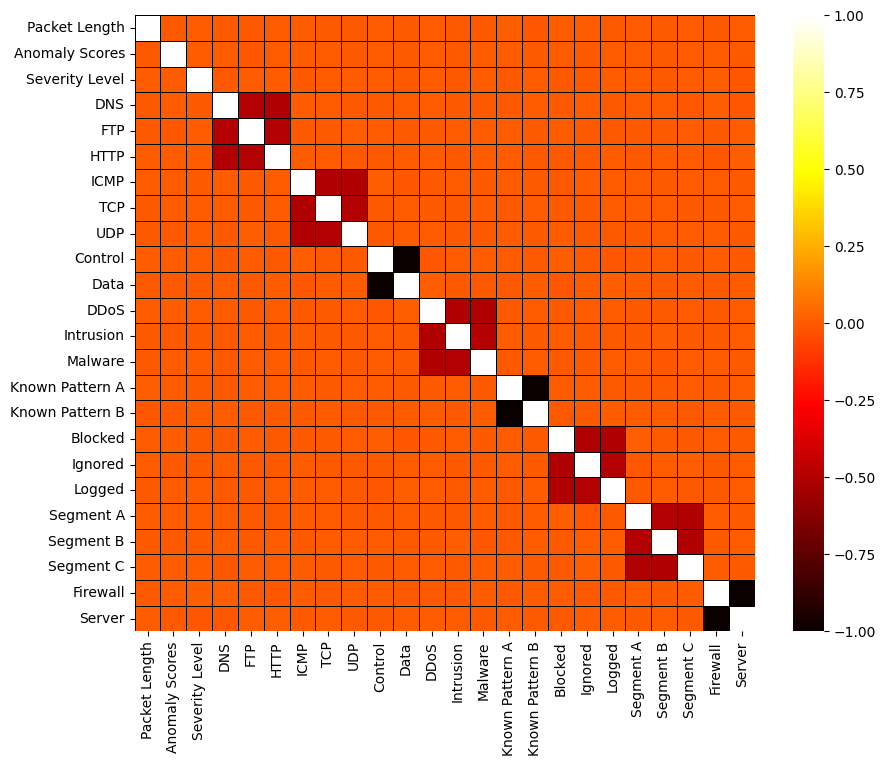

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=False, fmt=".2f", cmap='hot', linewidths=0.5, linecolor='black')
plt.show()

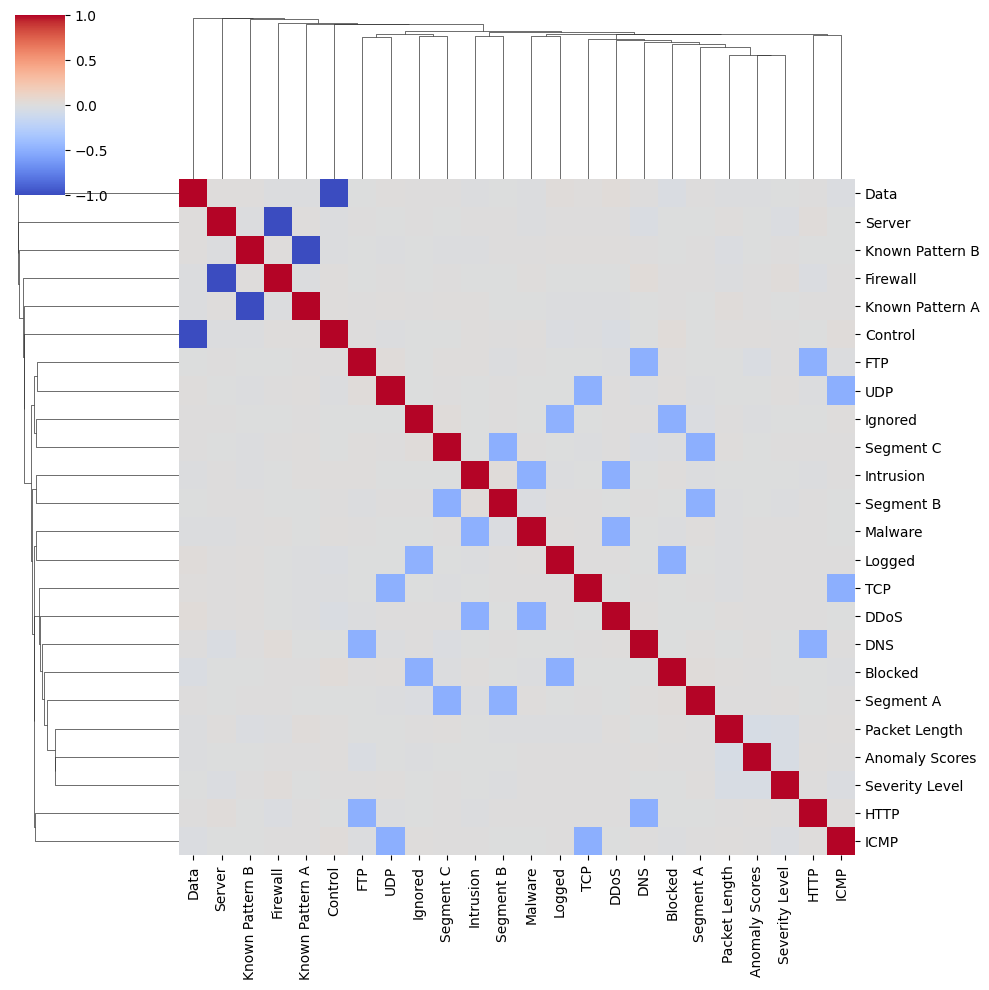

In [17]:
# Plot Clustermap

sns.clustermap(correlation.corr(), cmap="coolwarm", figsize=(10, 10))
plt.show()

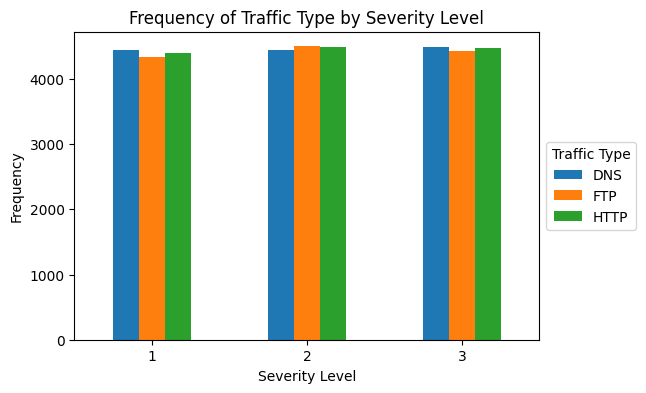

In [18]:
# DNS FTP HTTP are Traffic Type
# Use Severity Level


# Filter only rows where at least one Traffic Type is True
True_TT = new_ns[(new_ns[['DNS', 'FTP', 'HTTP']] == True).any(axis=1)]

# Count True values per Severity Level for each Traffic Type
true_counts = True_TT.groupby('Severity Level')[['DNS', 'FTP', 'HTTP']].sum()

# Plot the results
true_counts.plot(kind='bar', figsize=(6,4))

plt.xlabel("Severity Level")
plt.ylabel("Frequency")
plt.title("Frequency of Traffic Type by Severity Level")
plt.legend(title="Traffic Type")
plt.xticks(rotation=0)

plt.legend(title="Traffic Type", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


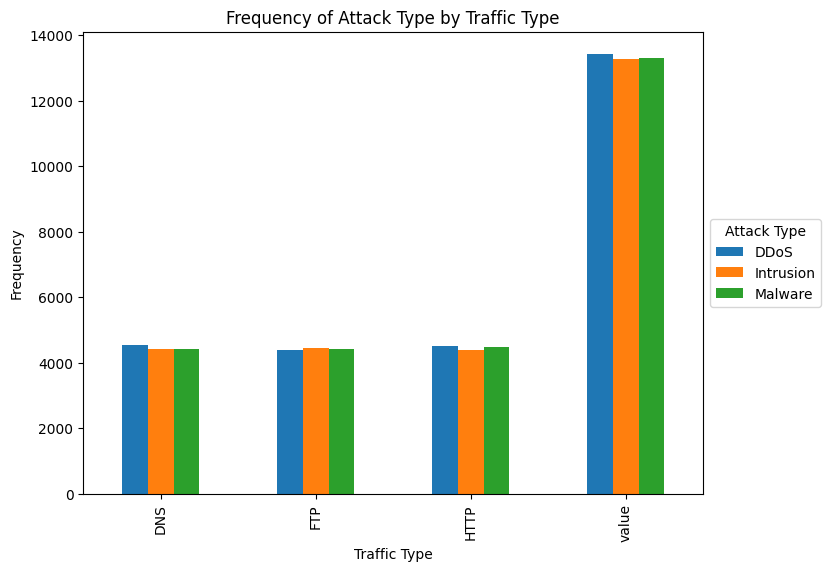

In [19]:

# Attack Type by Network Segment (Only True Values Considered)

# Filter only rows where at least one Attack Type is True
True_AT = new_ns[(new_ns[['DDoS', 'Intrusion', 'Malware']] == True).any(axis=1)]

# Filter only rows where at least one Network Segment is True
True_Traf = new_ns[(new_ns[['DNS', 'FTP', 'HTTP']] == True).any(axis=1)]

# Keep only rows where both Attack Type and Network Segment have at least one True
filtered_data = True_AT[True_AT.index.isin(True_Traf.index)]

# Count True values per Network Segment for each Attack Type
true_AT_counts = filtered_data[['DNS', 'FTP', 'HTTP']].melt(var_name='Traffic Type')
true_AT_counts = true_AT_counts[true_AT_counts['value'] == True]  # Keep only True values

# Count True occurrences of each attack type per network segment
attack_counts = filtered_data.melt(id_vars=['DNS', 'FTP', 'HTTP'],
                                   value_vars=['DDoS', 'Intrusion', 'Malware'],
                                   var_name='Attack Type')

attack_counts = attack_counts[attack_counts['value'] == True]  # Keep only True values

# Group by Network Segment and count occurrences of each Attack Type
final_counts = attack_counts.groupby(['Attack Type']).sum()

# Flip axes by transposing the DataFrame
final_counts.T.plot(kind='bar', figsize=(8,6))

plt.ylabel("Frequency")
plt.xlabel("Traffic Type")
plt.title("Frequency of Attack Type by Traffic Type")
plt.legend(title="Attack Type", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


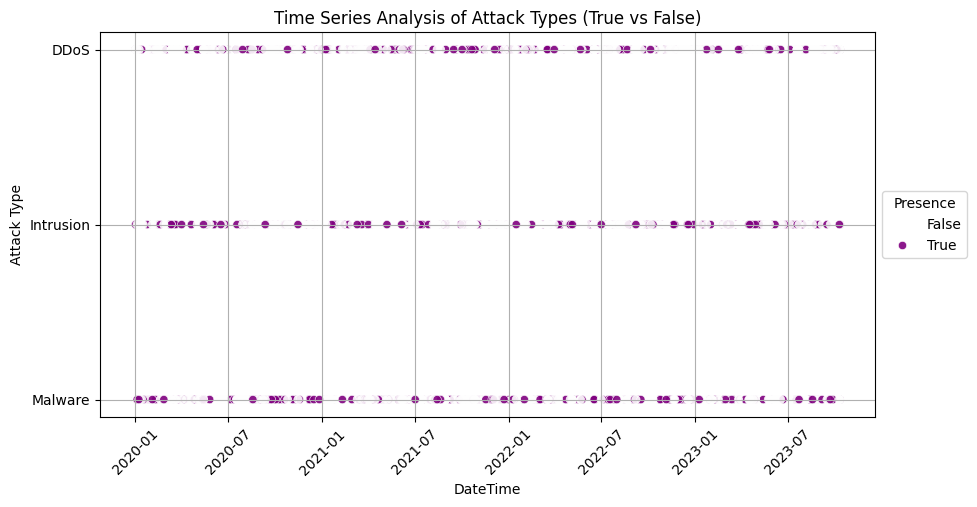

In [20]:

# Convert timestamp column to datetime format
new_ns['Timestamp'] = pd.to_datetime(new_ns['Timestamp'])

# Keep Attack Type columns along with Timestamp
attack_data = new_ns[['Timestamp', 'DDoS', 'Intrusion', 'Malware']]

# Melt the dataframe for plotting (convert wide to long format)
melted_AT = attack_data.melt(id_vars=['Timestamp'], value_vars=['DDoS', 'Intrusion', 'Malware'],
                             var_name='Attack Type', value_name='Presence')

# Create scatter plot with hue for True/False distinction
plt.figure(figsize=(10, 5))
sns.scatterplot(data=melted_AT, x='Timestamp', y='Attack Type', hue='Presence', alpha=0.9, palette={True: 'purple', False: 'white'})

plt.xlabel('DateTime')
plt.ylabel('Attack Type')
plt.title('Time Series Analysis of Attack Types (True vs False)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Presence", loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


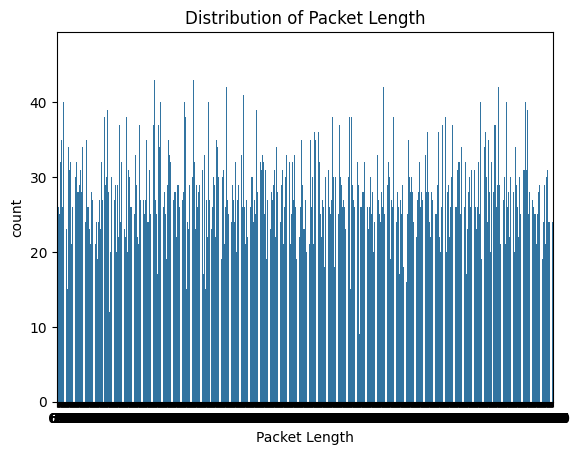

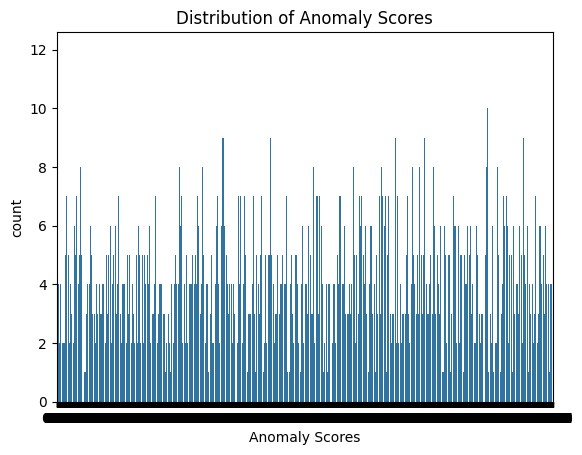

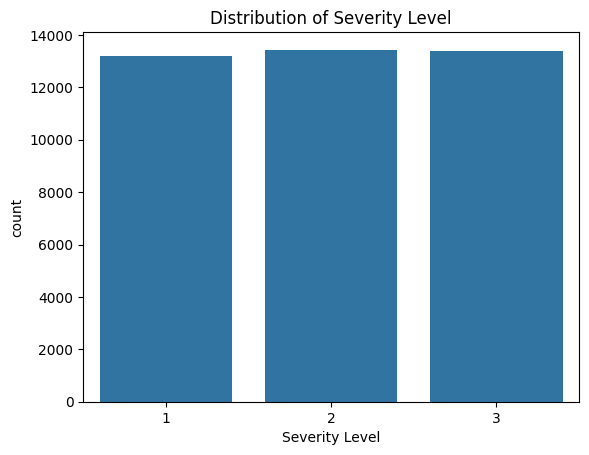

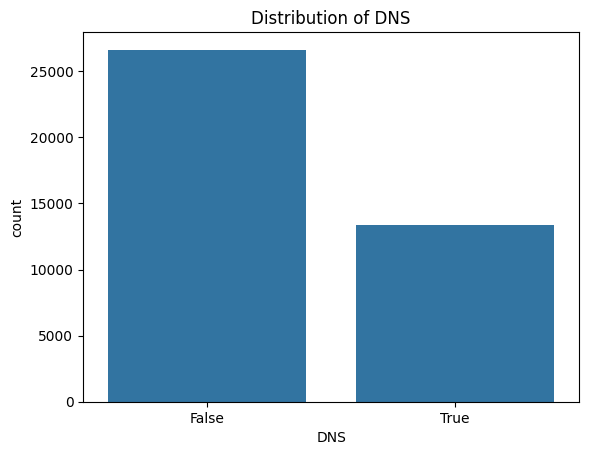

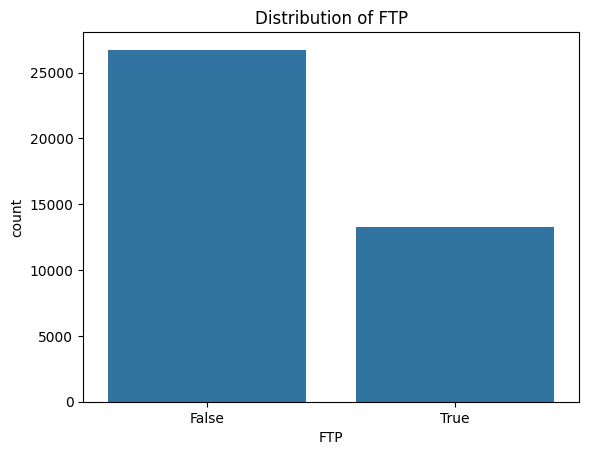

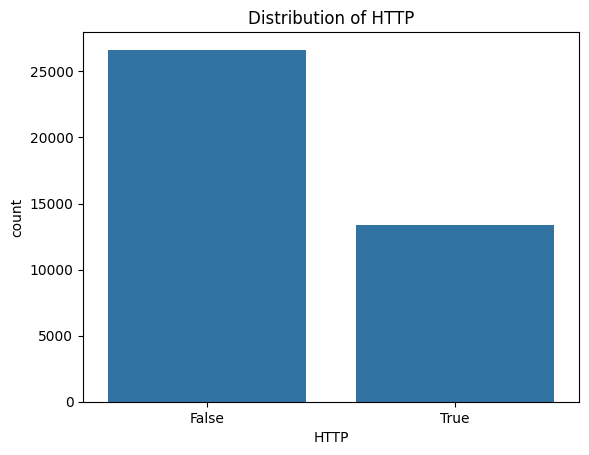

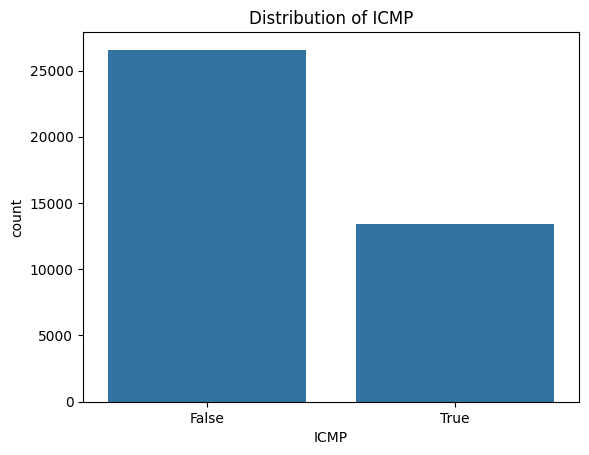

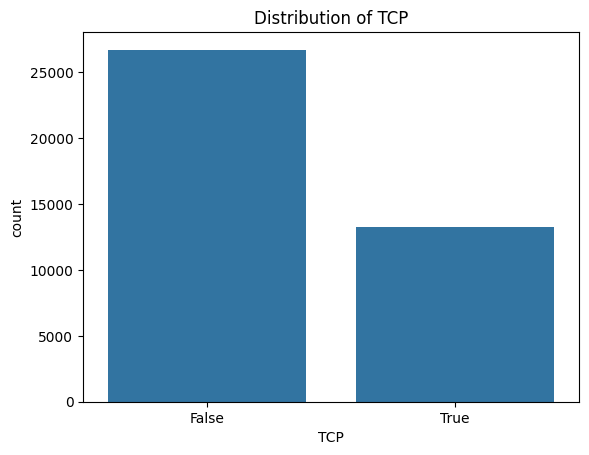

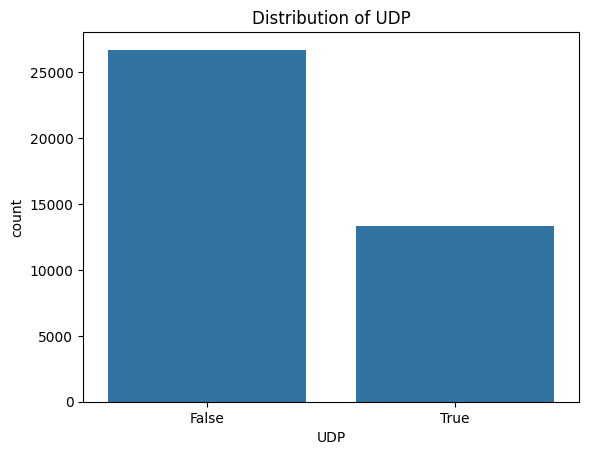

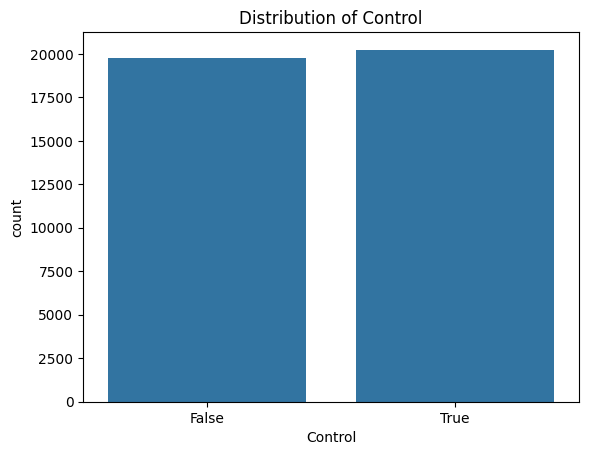

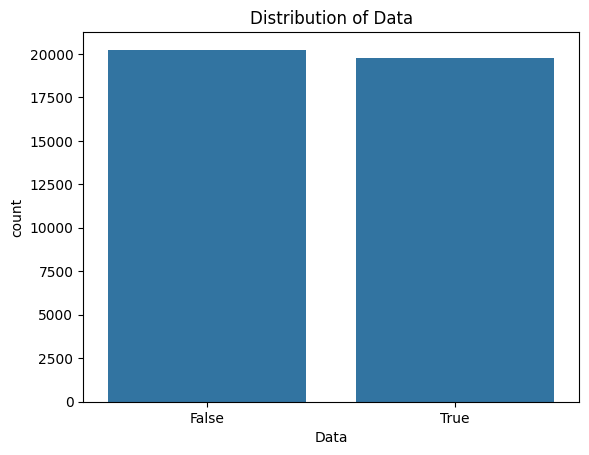

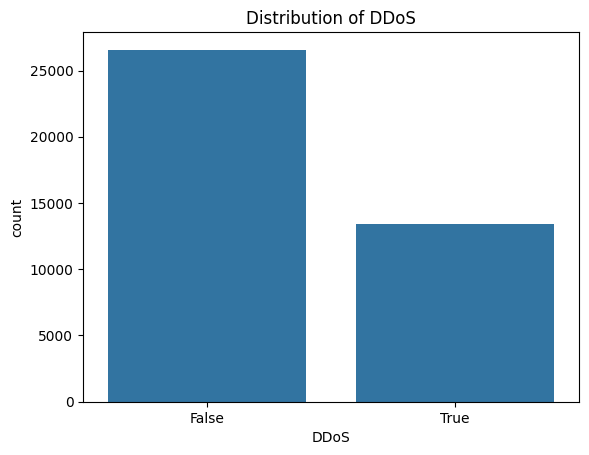

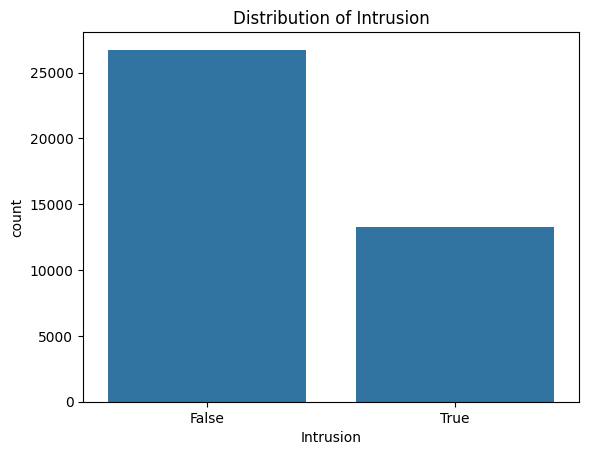

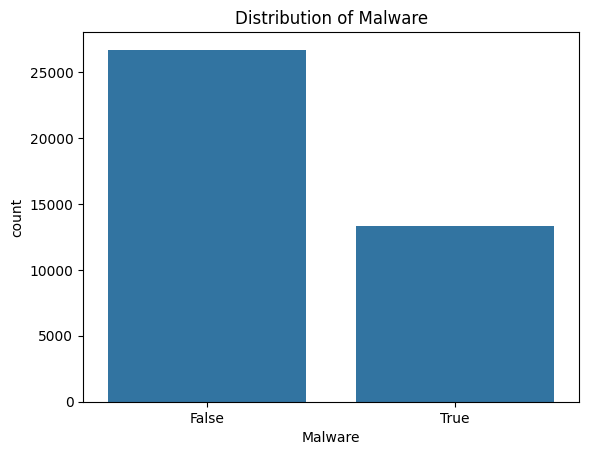

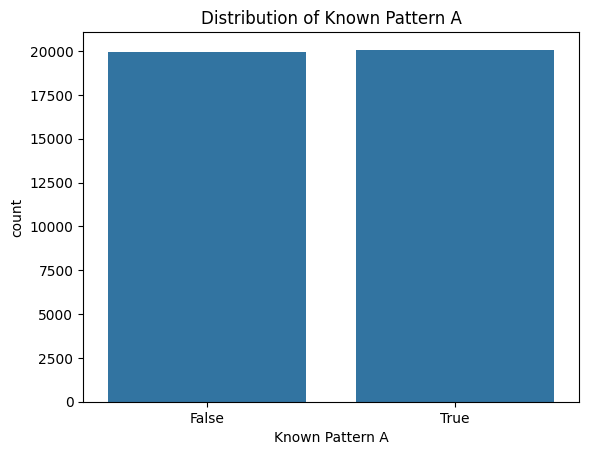

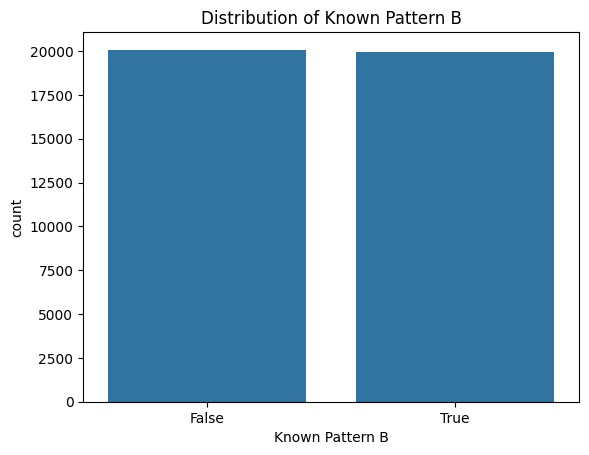

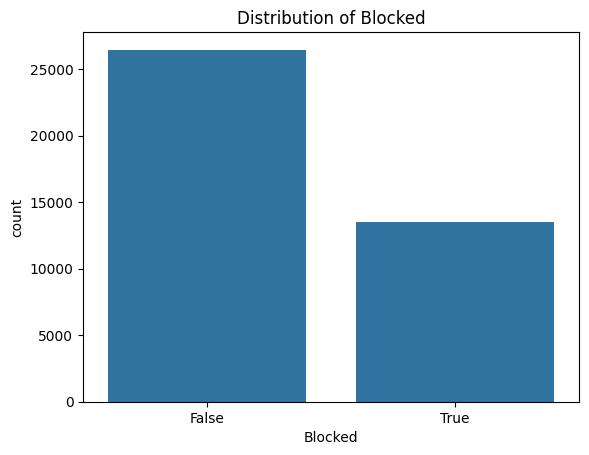

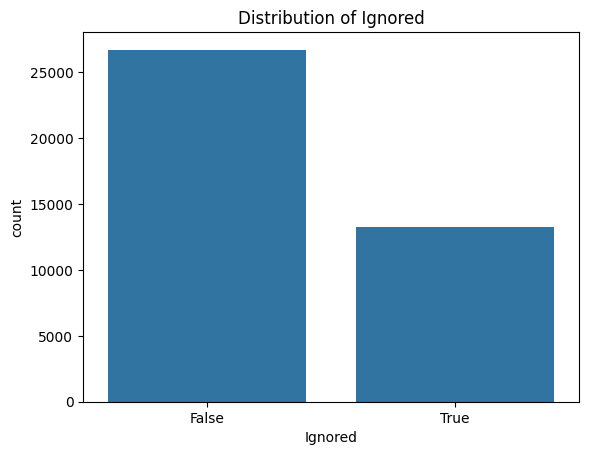

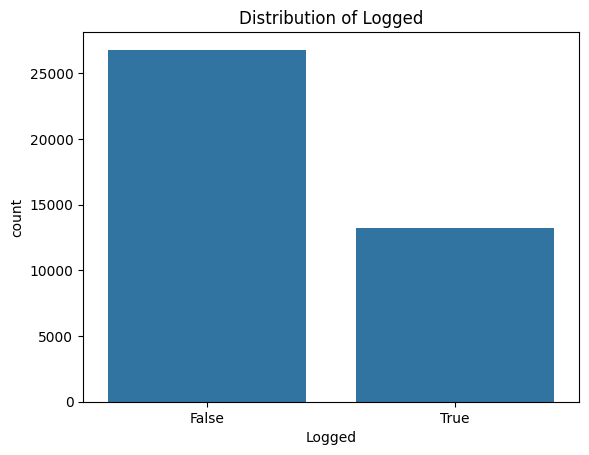

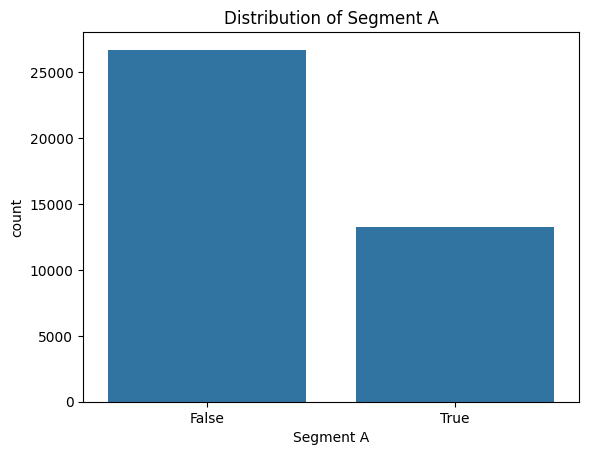

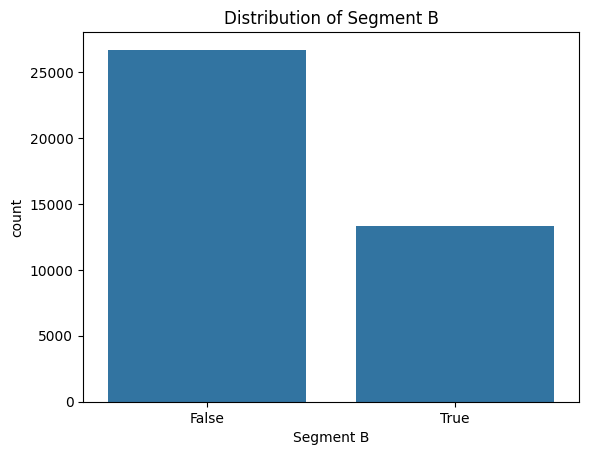

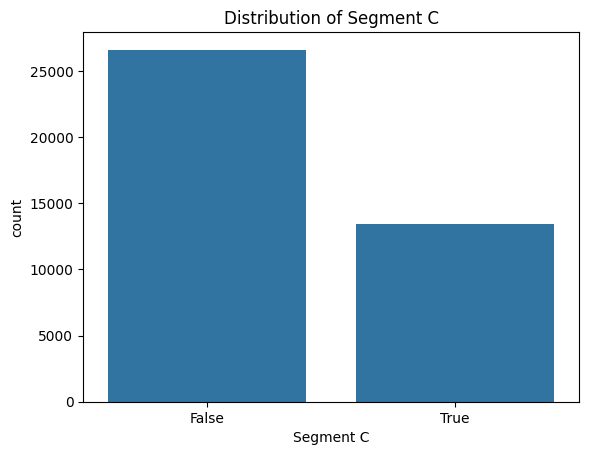

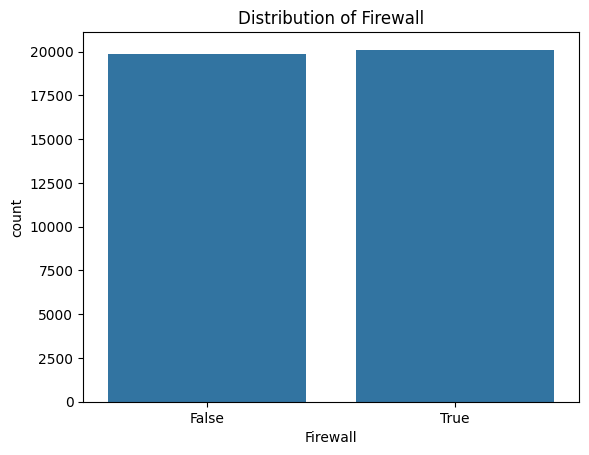

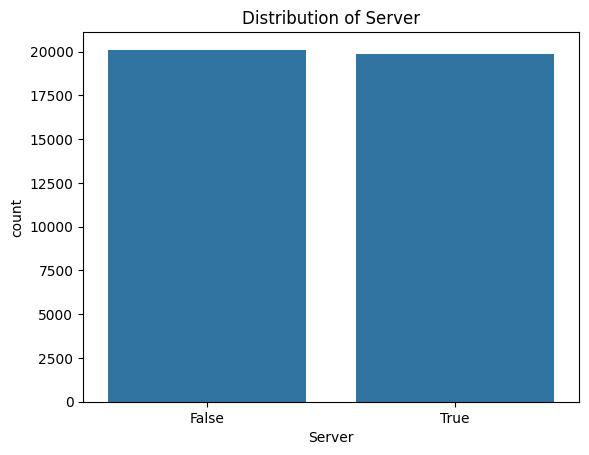

In [21]:
# Make Countplots

plot_ns = new_ns[['Packet Length', 'Anomaly Scores',
             'Severity Level',
             'DNS', 'FTP', 'HTTP', 'ICMP', 'TCP', 'UDP', 'Control', 'Data', 'DDoS',
             'Intrusion', 'Malware', 'Known Pattern A', 'Known Pattern B', 'Blocked',
             'Ignored', 'Logged', 'Segment A', 'Segment B', 'Segment C', 'Firewall',
             'Server']]

for column in plot_ns.columns:
    sns.countplot(x=column, data=plot_ns)
    plt.title(f"Distribution of {column}")
    plt.show()

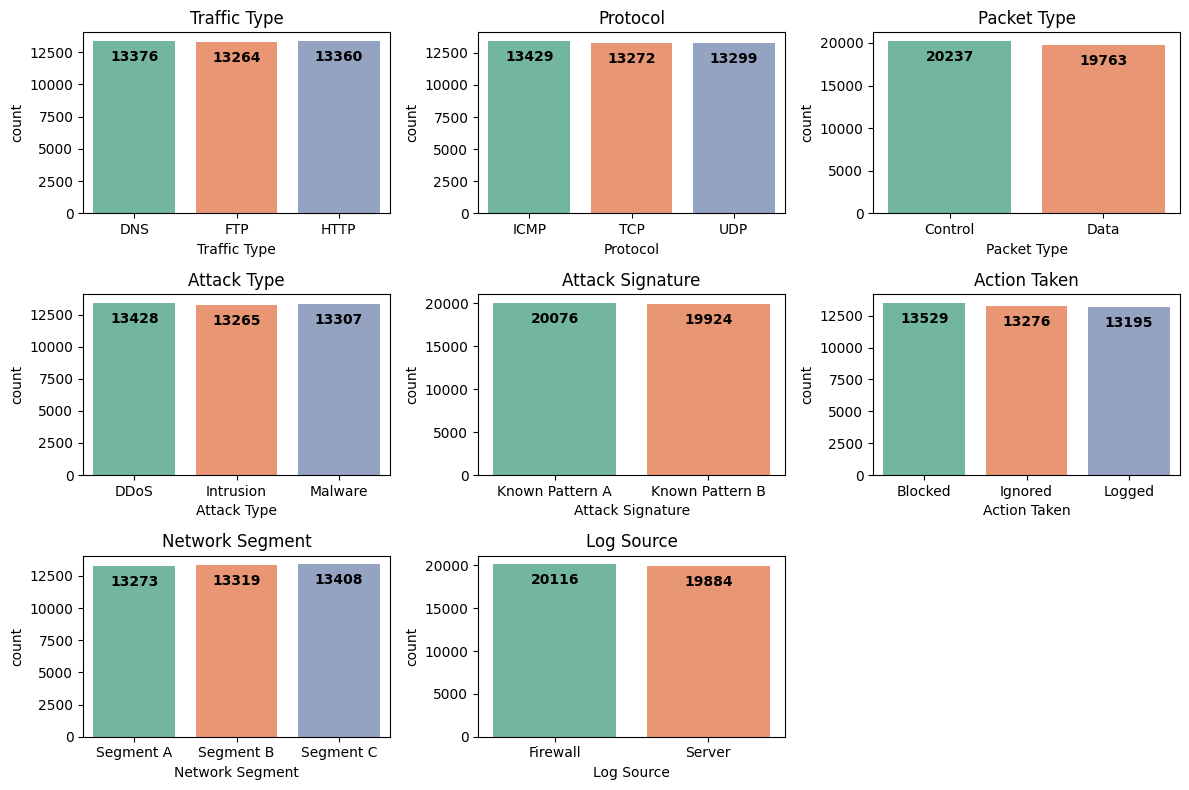

In [22]:
# Count plots

groups = {
    'Traffic Type': ['DNS', 'FTP', 'HTTP'],
    'Protocol': ['ICMP', 'TCP', 'UDP'],
    'Packet Type': ['Control', 'Data'],
    'Attack Type': ['DDoS', 'Intrusion', 'Malware'],
    'Attack Signature': ['Known Pattern A', 'Known Pattern B'],
    'Action Taken': ['Blocked', 'Ignored', 'Logged'],
    'Network Segment': ['Segment A', 'Segment B', 'Segment C'],
    'Log Source': ['Firewall', 'Server']
}

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, (group, features) in enumerate(groups.items()):
    # Melt and filter for True values
    ft = new_ns[features].melt().query('value == True').rename(columns={'variable': group})

    # Create count plot
    ax = axes[i]
    sns.countplot(x=group, hue=group, data=ft, ax=ax, palette="Set2", legend=False)
    ax.set_title(group)

    # Annotate bars with counts, moving them slightly down
    for p in ax.patches:
        count = int(p.get_height())  # Get bar height (count value)
        ax.annotate(f"{count}",
                    (p.get_x() + p.get_width() / 2, p.get_height() - 0.05 * ax.get_ylim()[1]),  # Move down by 5% of y-axis range
                    ha='center', va='top', fontsize=10, color='black', fontweight='bold')

# Hide unused axes if fewer than 9 plots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


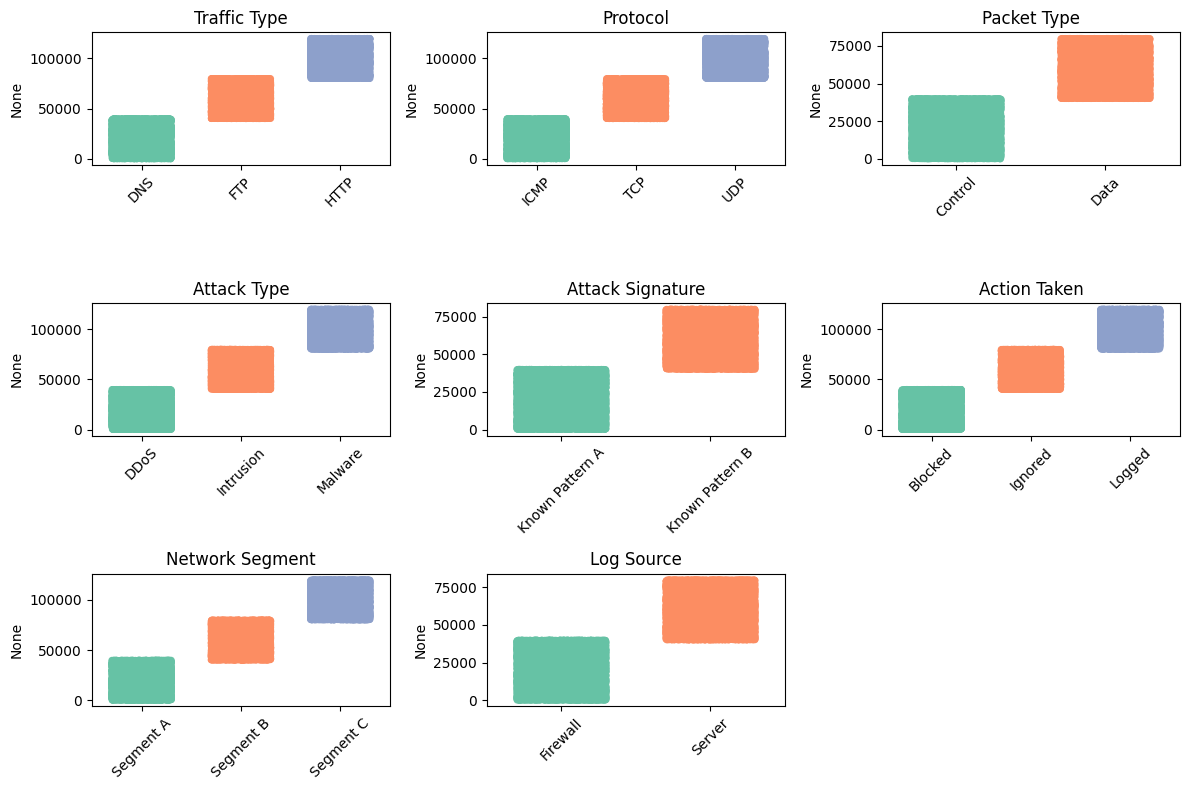

In [23]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, (group, columns) in enumerate(groups.items()):
    if all(col in new_ns.columns for col in columns):  # Ensure columns exist
        sp = new_ns[columns].melt(var_name="Category", value_name="Presence")
        sp = sp[sp["Presence"] == True]  # Keep only True values

        sns.stripplot(x="Category", y=sp.index, hue="Category", data=sp, ax=axes[i], jitter=0.3, palette='Set2', alpha=0.7, legend=False)
        axes[i].set_title(group)
        axes[i].set_xlabel("")  # Remove redundant x-label
        axes[i].tick_params(axis='x', rotation=45)  # Rotate for readability

# Hide unused axes if there are fewer than 9 subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


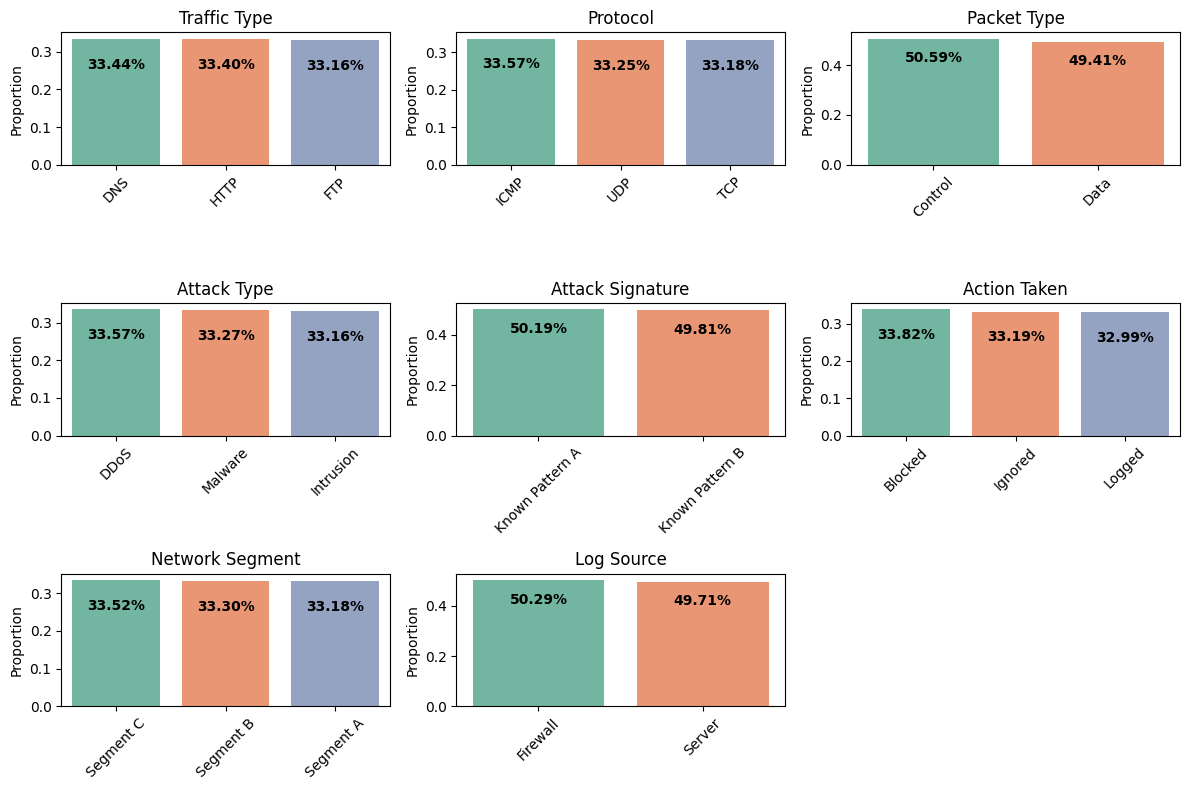

In [24]:
# Proportion Plot

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, (group, columns) in enumerate(groups.items()):
    if all(col in new_ns.columns for col in columns):  # Ensure columns exist
        sp = new_ns[columns].melt(var_name="Category", value_name="Presence")
        sp = sp[sp["Presence"] == True]  # Keep only True values

        # Correctly calculate proportions per category group
        proportions = sp["Category"].value_counts().reset_index()
        proportions.columns = ["Category", "Count"]
        proportions["Proportion"] = proportions["Count"] / proportions["Count"].sum()  # Normalize correctly

        ax = axes[i]
        sns.barplot(x="Category", y="Proportion", hue="Category", data=proportions, ax=ax, palette="Set2", legend=False)

        # Annotate bars with percentages, moving them lower
        for p in ax.patches:
            proportion_value = p.get_height()
            percentage = f'{proportion_value * 100:.2f}%'

            ax.annotate(percentage,
                        (p.get_x() + p.get_width() / 2, proportion_value - 0.05),  # Move down by 5%
                        ha='center', va='top', fontsize=10, color='black', fontweight='bold')

        ax.set_title(group)
        ax.set_xlabel("")  # Remove redundant x-label
        ax.set_ylabel("Proportion")  # Label as Proportion
        ax.tick_params(axis="x", rotation=45)  # Rotate for readability

# Hide unused axes if fewer than 9 subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()



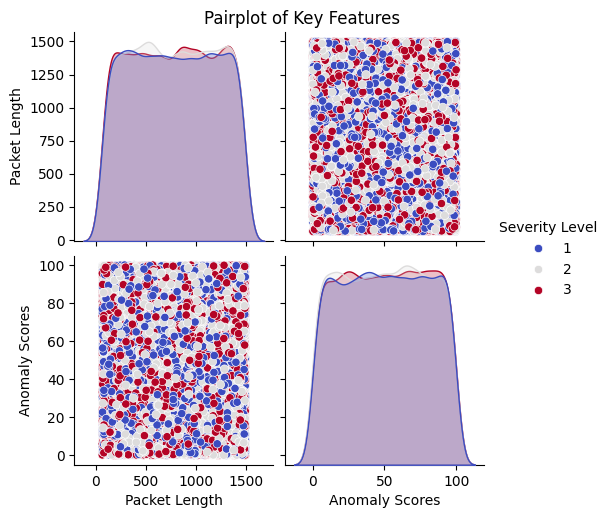

In [25]:
# Select key numerical features for Pair Plots
ft = ['Packet Length', 'Anomaly Scores', 'Severity Level']

# Pairplot with color based on Severity Level
sns.pairplot(new_ns[ft], hue='Severity Level', diag_kind='kde', palette="coolwarm")

plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

In [26]:
print(new_ns.info())  # All columns and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           40000 non-null  datetime64[ns]
 1   Packet Length       40000 non-null  int64         
 2   Malware Indicators  40000 non-null  object        
 3   Anomaly Scores      40000 non-null  float64       
 4   Alerts/Warnings     40000 non-null  object        
 5   Severity Level      40000 non-null  int64         
 6   Firewall Logs       40000 non-null  object        
 7   IDS/IPS Alerts      40000 non-null  object        
 8   DNS                 40000 non-null  bool          
 9   FTP                 40000 non-null  bool          
 10  HTTP                40000 non-null  bool          
 11  ICMP                40000 non-null  bool          
 12  TCP                 40000 non-null  bool          
 13  UDP                 40000 non-null  bool      

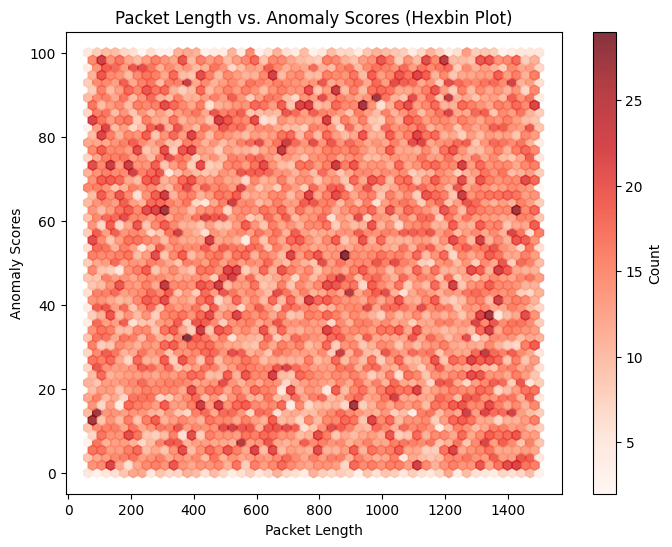

In [27]:

# Source Port vs Destination Port & Packet Length vs Anomaly Scores

plt.figure(figsize=(8,6))
plt.hexbin(new_ns['Packet Length'], new_ns['Anomaly Scores'], gridsize=50, cmap="Reds", alpha=0.8)
plt.colorbar(label="Count")
plt.xlabel("Packet Length")
plt.ylabel("Anomaly Scores")
plt.title("Packet Length vs. Anomaly Scores (Hexbin Plot)")
plt.show()


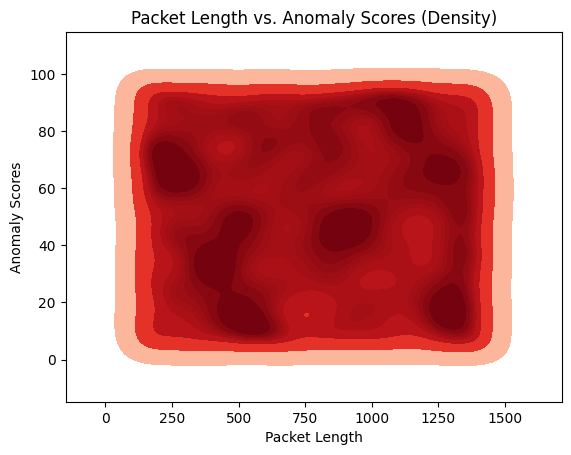

In [28]:
sns.kdeplot(x=new_ns['Packet Length'], y=new_ns['Anomaly Scores'], cmap="Reds", fill=True)
plt.xlabel("Packet Length")
plt.ylabel("Anomaly Scores")
plt.title("Packet Length vs. Anomaly Scores (Density)")
plt.show()